In [2]:
import pandas as pd
data=pd.read_csv("clean_weather.csv")
data=data.ffill()
data.head()

,Unnamed: 0,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.0,52.0
1,1970-01-02,52.0,39.0,0.0,52.0
2,1970-01-03,52.0,35.0,0.0,53.0
3,1970-01-04,53.0,36.0,0.0,52.0
4,1970-01-05,52.0,35.0,0.0,50.0


In [4]:
data.index=data['Unnamed: 0']

In [6]:
del data['Unnamed: 0']

<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

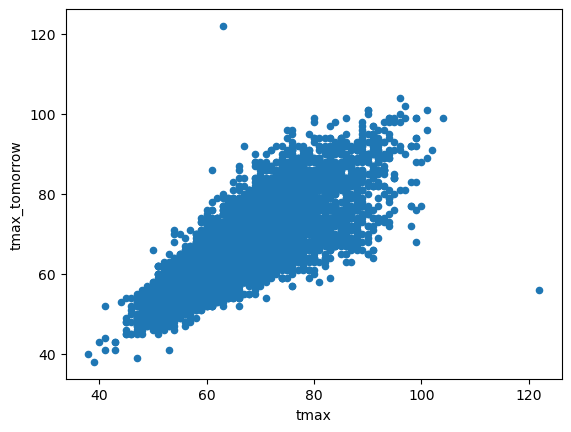

In [12]:
import matplotlib.pyplot as plt

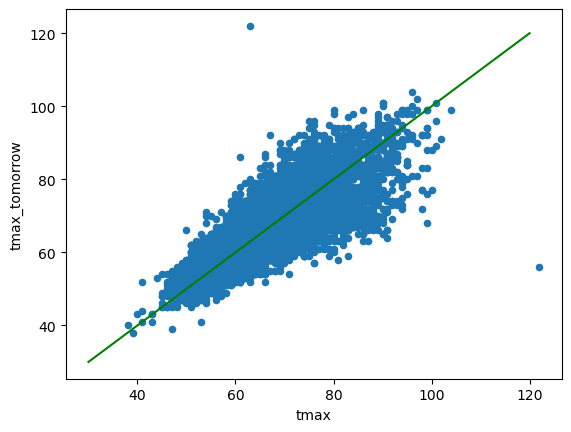

In [17]:
data.plot.scatter('tmax','tmax_tomorrow')
plt.plot([30,120],[30,120],'green')
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(data[['tmax']],data['tmax_tomorrow'])

LinearRegression()

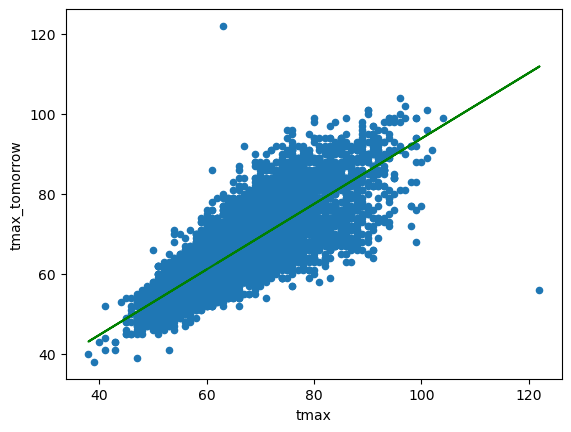

In [20]:
data.plot.scatter("tmax",'tmax_tomorrow')
plt.plot(data["tmax"],lr.predict(data[["tmax"]]),"green")

In [23]:
print(f"Weight:{lr.coef_[0]:.2f}")
print(f"Intercept:{lr.intercept_:.2f}")

Weight:0.82
Intercept:11.99


# Loss

In [24]:
import numpy as np

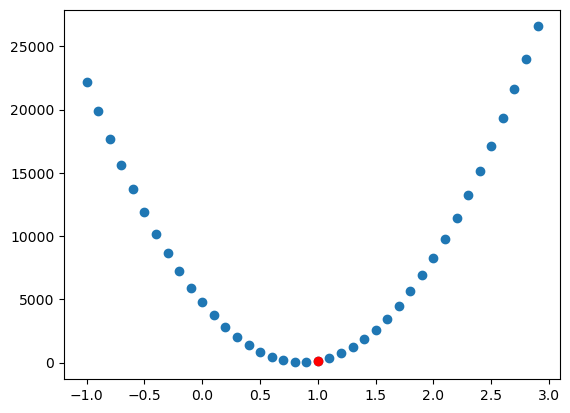

In [28]:
loss = lambda w,y:((w*80+11.99)-y)**2
y=81

ws=np.arange(-1,3,.1)
losses=loss(ws,y)

plt.scatter(ws,losses)
plt.plot(1,loss(1,y),'ro')
plt.show()

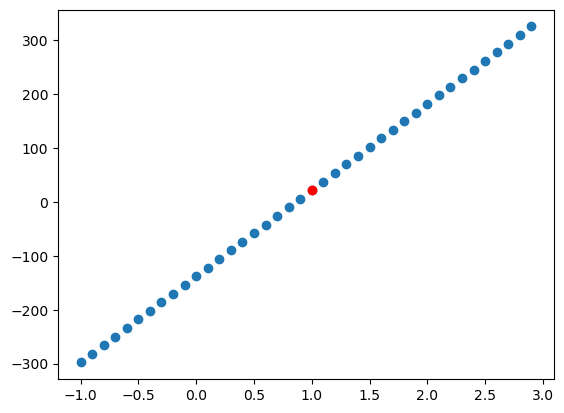

In [33]:
gradient = lambda w,y: ((w*80+11.99)-y)*2
gradients=gradient(ws,y)
plt.scatter(ws,gradients)
plt.plot(1,gradient(1,y),'ro')

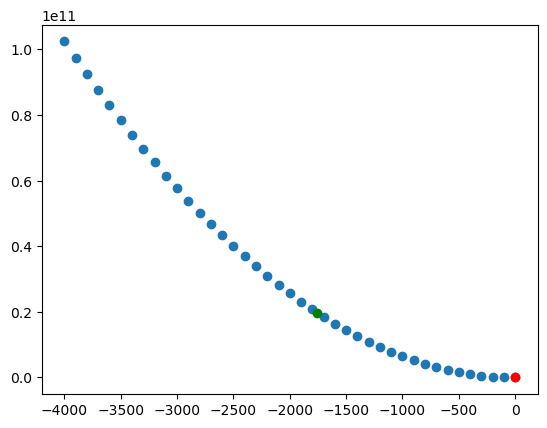

In [37]:
ws=np.arange(-4000,100,100)

losses=loss(ws,y)

plt.scatter(ws,losses)
plt.plot(1,loss(1,y),'ro')
new_weight=1-gradient(1,y)*80
plt.plot(new_weight,loss(new_weight,y),'go')

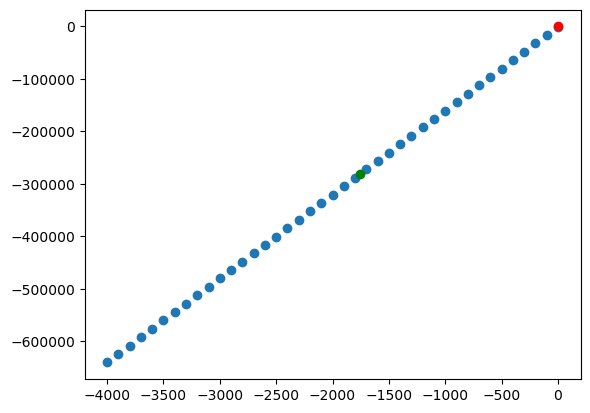

In [38]:
# Calculate gradient values for several weights
gradients = gradient(ws, y)

# Plot the weight and gradients
plt.scatter(ws, gradients)
plt.plot(1, gradient(1, y), 'ro')
# New weight
plt.plot(new_weight, gradient(new_weight, y), 'go')

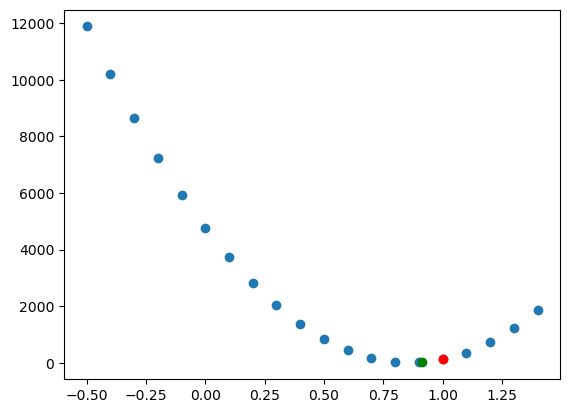

In [39]:
ws = np.arange(-.5,1.5,.1)
losses = loss(ws, y)

# Plot the weight and losses
plt.scatter(ws, losses)

# Original weight
plt.plot(1, loss(1, y), 'ro')
# New weight with learning rate
lr = 5e-5
new_weight = 1 - lr * gradient(1,y) * 80
plt.plot(new_weight, loss(new_weight, y), 'go')

In [40]:
new_weight

0.91208